<a href="https://colab.research.google.com/github/marcosdiezw/Populacao_de_rua_BH/blob/main/Populacao_de_rua_BH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=purple size=7> **ANALISE DOS DADOS DA POPULAÇÃO QUE MORA NAS RUAS DE BELO HORIZONTE**





![Logo prefeitura](https://prefeitura.pbh.gov.br/sites/default/files/estrutura-de-governo/comunicacao/2021/logo_21prancheta-1.png)

## **INTRODUÇÃO**

---

_A cidade de Belo Horizonte possui uma quantidade importante de pessoas que moram na rua e que, por tanto, sofrem as implicâncias dessa situação._ <br><br>
_Em cooperação com diversas entidades e associações públicas e privadas, a prefeitura de Belo Horizonte se propõe desenvolver um processo de ajuda e atenção integral, melhoria de qualidade de vida e reinserção na sociedade da população que mora na rua._ <br><br>
_Com o objetivo de desenvolver um plano de trabalho com ações concretas e eficazes, segue uma descrição básica das informações coletadas no mês de setembro de 2021, e a continuação, um conjunto de perguntas estratégicas, agrupadas em tópicos de interesse especial._


## **Importação de pacotes e DataFrame**

In [ ]:
# Importamos os pacotes e bibliotecas a serem utilizados na nossa análise
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
import io
from google.colab import files 
import matplotlib.pyplot as plt

In [ ]:
# Utilizaremos a base de dados do mês de setembro de 2021, que é a última coleta de informação.

In [ ]:
# Lendo o arquivo.
df = pd.read_csv('https://raw.githubusercontent.com/marcosdiezw/Populacao_de_rua_BH/main/Populac_rua.csv') 

## Conhecimento da base de dados 

In [ ]:
# verificando o tamanho da base de dados
print("Informações Sobre o a base de dados População de rua")
print("Variáveis:\t {}".format(df.shape[1]))
print("Entradas:\t {}\n".format(df.shape[0]))


# identificando os tipos das variáveis
display(df.info(12))

Informações Sobre o a base de dados População de rua
Variáveis:	 15
Entradas:	 8659

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8659 entries, 0 to 8658
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Tempo_rua        8659 non-null   object 
 1   Contato_parente  8659 non-null   object 
 2   Data_nascimento  8659 non-null   object 
 3   Idade            8659 non-null   int64  
 4   Sexo             8659 non-null   object 
 5   Bolsa_familia    8659 non-null   object 
 6   Pop_rua          8659 non-null   object 
 7   Grau_instrucao   8659 non-null   object 
 8   Cor_raca         8659 non-null   object 
 9   Renda_fam        8659 non-null   object 
 10  Remuneracao_ant  8625 non-null   float64
 11  CRAS             8659 non-null   object 
 12  Regional         8659 non-null   object 
 13  Desat_cadastral  8659 non-null   object 
 14  Mes_ano          8659 non-null   object 
dtypes: float64(1), int64(

None

### Dicionário de dados

| **Nome da Variável** | **Descrição**         |
|:--------------------:|:---------------------:| 
|Tempo_rua             |Tempo que vive na rua | 
|Contato_parente       |Contato com parentes, fora ou dentro da rua
|Data_nascimento       |                       | 
|Idade                 | "MASCULINO" ou "FEMININO"                  | 
|Bolsa_familia         | Recepção de bolsa de familia                  | 
|Pop_rua               |   **Mora na rua**= SIM   **Não mora na rua=** NAO
|Grau_instrucao        | Nível de educação formal                |
|Cor_raca              | Cor de pele           |
|Renda_fam             | Faixa da renda familiar per capita| 
|Remunerac_ant         | Vale remuneraçao do mes passado | 
|CRAS                  | Centro de referência de assistencia social| 
|Regional              |  Região de Belo Horizonte                  | 
|Desat_cadastral       |Faixa de desatualização cadastral          |
|Mes_ano               |Mês e ano de referência|

In [ ]:
# Olhada inicial à base de dados.

df.head(5)

,Tempo_rua,Contato_parente,Data_nascimento,Idade,Sexo,Bolsa_familia,Pop_rua,Grau_instrucao,Cor_raca,Renda_fam,Remuneracao_ant,CRAS,Regional,Desat_cadastral,Mes_ano
0,Ate seis meses,Quase nunca,04/06/1986,35,MASCULINO,NAO,SIM,Medio incompleto,Parda,Acima de 0.5 Salario Minimo,0.0,ENDERECO FORA AREA CRAS,NORDESTE,19 a 24 Meses,01/09/2021
1,Ate seis meses,Todo mes,01/03/1992,29,FEMININO,NAO,SIM,Sem instrucao,Preta,Entre R$178.01 ate 0.5 Salario Minimo,0.0,CRAS VILA ANTENA,OESTE,ate 12 Meses,01/09/2021
2,Ate seis meses,Todo dia,03/04/1958,63,FEMININO,NAO,SIM,Fundamental incompleto,Parda,Acima de 0.5 Salario Minimo,0.0,ENDERECO FORA AREA CRAS,CENTRO SUL,25 a 36 Meses,01/09/2021
3,Entre cinco e dez anos,Nunca,05/02/1965,56,MASCULINO,NAO,SIM,Fundamental incompleto,Parda,Ate R$89.00,0.0,ENDERECO FORA AREA CRAS,CENTRO SUL,19 a 24 Meses,01/09/2021
4,Mais de dez anos,Nunca,25/10/1959,61,MASCULINO,NAO,SIM,Sem instrucao,Parda,Ate R$89.00,0.0,ENDERECO FORA AREA CRAS,LESTE,19 a 24 Meses,01/09/2021


### **Regiões de Belo Horizonte**

![Mapa de BH](https://www.researchgate.net/profile/Leonardo-Freire-De-Mello/publication/257298339/figure/fig1/AS:669422431776769@1536614153075/Figura-22-Mapa-das-Regioes-Administrativas-da-cidade-de-Belo-Horizonte-9.ppm)

## **1) DESCRIÇÃO GERAL DA POPULAÇÃO**



**1.1. Quantas pessoas morando na rua há em Belo Horizonte?**

In [ ]:
df['Contador']=1
quant_moradores = sum(df.Contador)
print('Em Belo Horizonte há',quant_moradores,'pessoas morando na rua')

Em Belo Horizonte há 8659 pessoas morando na rua


**1.2. Quais os bairros onde se alocam os moradores de rua?**

In [ ]:
# Consultamos a contagem de moradores de rua por bairro:
df['Regional'].value_counts()

CENTRO SUL                       5079
LESTE                            1120
NORTE                             662
NOROESTE                          588
VENDA NOVA                        286
OESTE                             251
BARREIRO                          225
NORDESTE                          214
PAMPULHA                          175
ENDERECO NAO GEORREFERENCIADO      59
Name: Regional, dtype: int64

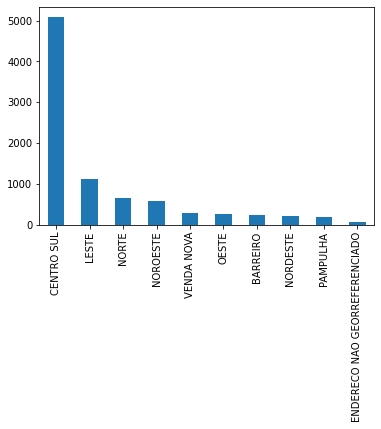

In [ ]:
df['Regional'].value_counts().plot(kind='bar');

**1.3. Qual é o bairro que possui a maior quantidade?**

In [ ]:
# Identificamos o bairro que apressenta a maior quantidade de moradores de rua:
max_reg = (df['Regional'].value_counts()).max()

# Consultamos a moda dos bairros para obter o atributo (no caso, o nome do bairro) que possui maior quantidade.
bairro_reg = df['Regional'].mode()[0];

print('O bairro com maior quantidade de moradores de rua, com',max_reg,'pessoas,', 'é:', bairro_reg)

O bairro com maior quantidade de moradores de rua, com 5079 pessoas, é: CENTRO SUL


**1.4. Qual porcentagem de moradores homens e qual de mulheres?**

In [ ]:
df['Sexo'].value_counts()

MASCULINO    7755
FEMININO      904
Name: Sexo, dtype: int64

Do total do moradores de rua, 10.44 % são mulheres e 89.56 % são homens.

 



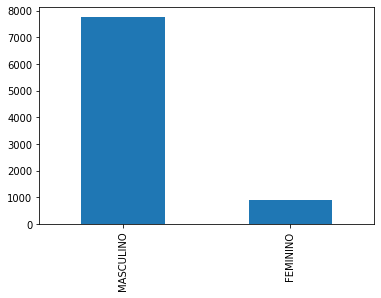

In [ ]:
mulheres = df[df['Sexo'] =='FEMININO'] # Conjunto da população feminina.
homens = df[df['Sexo'] =='MASCULINO'] # Conjunto da população feminina.

# Cálculo de porcentagem de mulheres (arredondando a duas casas)
porc_fem = round((len(mulheres)/quant_moradores)*100,2) 

# Cálculo de porcentagem de homens (arredondando a duas casas)
porc_masc = round((len(homens)/quant_moradores)*100,2)

print('Do total do moradores de rua,', porc_fem, '% são mulheres e', porc_masc, '% são homens.')

print('\n', '\n')

df['Sexo'].value_counts().plot(kind='bar')

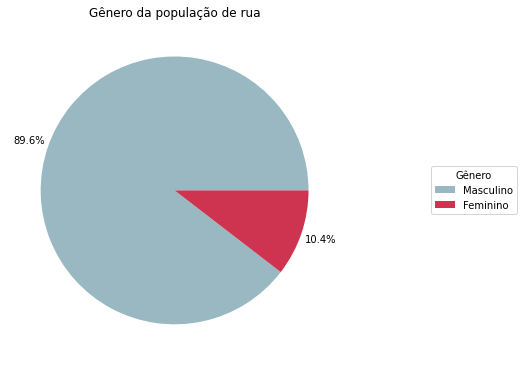

In [ ]:
legenda = ['Masculino', 'Feminino']
valores_sexo = [porc_masc,porc_fem]
cores_grafico = ['#99b8c1', '#ce3450']

fig, ax = plt.subplots(figsize=(6, 20), subplot_kw=dict(aspect="equal"))

ax.pie(valores_sexo, autopct='%0.1f%%', pctdistance=1.15, colors=cores_grafico)

ax.legend(labels=legenda, title="Gênero", loc="center left",bbox_to_anchor=(1.25, 0, 0.5, 1))

ax.set_title("Gênero da população de rua")

plt.show()

**1.5. Qual a população que fica fora da atuação do Centro de Referência de Assistencia Social (CRAS)?** <br>
**1.6. Em quais regiões ficam alocados?**

1127 moradores de rua, que representam   13.02 %   do total, ficam por fora da area de atuação do CRAS.


Esses moradores, fora da area do CRAS, se alocam nas seguintes regiões: 

NORTE                            644
NOROESTE                         252
ENDERECO NAO GEORREFERENCIADO     59
VENDA NOVA                        37
CENTRO SUL                        33
LESTE                             25
PAMPULHA                          22
OESTE                             21
NORDESTE                          18
BARREIRO                          16
Name: Regional, dtype: int64 



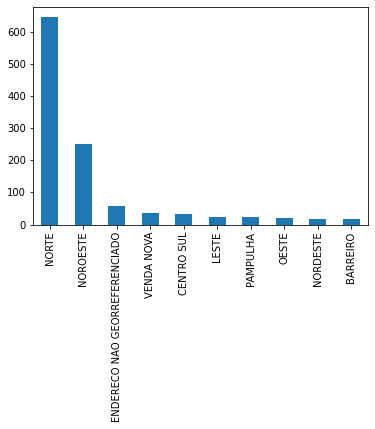

In [ ]:
# Criamos a variável "sem_CRAS", que recohle os dados destas pessoas.
sem_CRAS = df[df.CRAS != 'ENDERECO FORA AREA CRAS']
qsem_CRAS = sem_CRAS.Regional.count()
porc_semCRAS = ((qsem_CRAS/quant_moradores)*100).round(2) #Calculamos a porcentagem.

print(qsem_CRAS, 'moradores de rua, que representam  ',porc_semCRAS,'%   do total, ficam por fora da area de atuação do CRAS.')

print('\n')

print('Esses moradores, fora da area do CRAS, se alocam nas seguintes regiões:', '\n')
print(sem_CRAS.Regional.value_counts(), '\n')
sem_CRAS['Regional'].value_counts().plot(kind='bar');

**1.7. Quais as porcentagens de pessoas segundo a cor da pele?**

Parda            59.926088
Preta            23.605497
Branca           15.775494
Amarela           0.438850
Nao Informado     0.138584
Indigena          0.115487
Name: Cor_raca, dtype: float64 



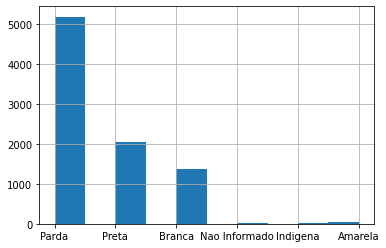

In [ ]:
print((df['Cor_raca'].value_counts(1))*100,'\n')
df.Cor_raca.hist()

**1.8. Qual a distribuição de idades dos moradores de rua?**

In [ ]:
media_idade = round(df.Idade.mean(),2) # Cálculo da  média de idade
mediana_idade = int(df.Idade.median()) # Cálculo da mediana
max_idade = df.Idade.max() # Cálculo da idade do morador mais velho
min_idade = df.Idade.min() # Cálculo da idade do morador mais novo

print('A média de idade dos moradores de rua é de', media_idade, " anos.")
print('A mediana é de ' , mediana_idade, 'anos. Ou seja, o 50% mais novo dos moradores de rua de BH tem menos de ',mediana_idade)
print('O morador de rua mais novo de BH tem ',min_idade,'anos', 'e o mais velho', max_idade, 'anos.')


A média de idade dos moradores de rua é de 42.41  anos.
A mediana é de  42 anos. Ou seja, o 50% mais novo dos moradores de rua de BH tem menos de  42
O morador de rua mais novo de BH tem  1 anos e o mais velho 89 anos.


In [ ]:
# Agrupação e contagem das idades dos moradores por faixa etária e por sexo

Idades = [0, 1, 13, 17, 29, 64, 90] # Lista dos extremos dos conjuntos da faixa etária
labels_faixas = ['1) Bebês [0-2)','2) Crianças [2,13)','3) Adolescentes[13,18)', '4) Adultos jovens [18,30)', '5) Adultos[30-65)', '6) Idosos [65+)'] # Lista Labels Age
df['Faixa_etaria'] = pd.cut(df.Idade, Idades, labels = labels_faixas,include_lowest = False).astype('object')

In [ ]:
# Definição de um dataframe segmentado para conhecer a faixa etária dos moradores.
df_Genero_Idade = pd.DataFrame(df, columns = ['Sexo','Faixa_etaria','Contador'])

# Agrupamento da quantidade de moradores por Gênero e Faixa Etária
df_Genero_Idade_1 = df_Genero_Idade.groupby(by=['Sexo','Faixa_etaria'])['Contador'].sum().reset_index()


# Realização um pivotamento da tabela para transformar a variável gênero em duas variáveis segmentadas pelo gênero
df_Genero_Idade_2 = pd.pivot_table(df_Genero_Idade_1, values='Contador', index=['Faixa_etaria'] ,columns='Sexo', aggfunc= 'sum', fill_value = 0).reset_index()

# Criar uma variável "Total" para saber a quantidade dos moradores em cada faixa etária, independente do gênero.
df_Genero_Idade_2['Total'] = df_Genero_Idade_2['FEMININO'] + df_Genero_Idade_2['MASCULINO'] 

(print("Quadro Resumo sobre perfil etário e gênero da população de rua em BH"))
df_Genero_Idade_2.head(15)

Quadro Resumo sobre perfil etário e gênero da população de rua em BH


Sexo,Faixa_etaria,FEMININO,MASCULINO,Total
0,1) Bebês [0-2),1,0,1
1,"2) Crianças [2,13)",18,11,29
2,"3) Adolescentes[13,18)",3,4,7
3,"4) Adultos jovens [18,30)",159,1015,1174
4,5) Adultos[30-65),701,6479,7180
5,6) Idosos [65+),22,246,268


## **2) ALIMENTAÇÃO**

**2.1. Quais, quantas são e onde se alocam as pessoas que estão em uma situação alimentária critica por falta de recursos?** <br>

In [ ]:
# Para facilitar a manipulação posterior, indexamos os atributos da categoría 'Renda_fam' com equivalentes numéricos,
# conformandose uma escala desde o valor 0, que se corresponde com 'Ate R$89.00', até
# o valor 3 que representa 'Acima de 0.5 Salario Mínimo'.

renda_cat = OrdinalEncoder(categories=[['Ate R$89.00','Entre R$89.01 ate R$178.00', 'Entre R$178.01 ate 0.5 Salario Minimo', 'Acima de 0.5 Salario Minimo']])
renda_cat.fit(df[['Renda_fam']])
df['renda_cod'] = renda_cat.transform(df[['Renda_fam']])
df['renda_cod'] = df['renda_cod'].astype(int)
print(df[['renda_cod','Renda_fam']].value_counts().sort_index())

renda_cod  Renda_fam                            
0          Ate R$89.00                              8005
1          Entre R$89.01 ate R$178.00                 71
2          Entre R$178.01 ate 0.5 Salario Minimo     121
3          Acima de 0.5 Salario Minimo               462
dtype: int64


In [ ]:
# Criamos a variável "min_renda", que recolhe às pessoas que não recebem bolsa familia,
# no mês anterior receberam uma remuneracao inferior e possuem uma renda familiar
# per cápita inferiores a meio salário mínimo.

min_renda = df[(df.Bolsa_familia =='NAO')&(df.renda_cod<2)&(df.Remuneracao_ant < 550)]
print('Pessoas em situação crítica alimentária, classificadas por região:', '\n')
print(min_renda.Regional.value_counts())
print('\n','TOTAL-------------------------', min_renda.Regional.count())

Pessoas em situação crítica alimentária, classificadas por região: 

CENTRO SUL                       922
LESTE                            208
NORTE                            133
NOROESTE                         109
OESTE                             46
VENDA NOVA                        41
BARREIRO                          40
NORDESTE                          39
PAMPULHA                          29
ENDERECO NAO GEORREFERENCIADO      9
Name: Regional, dtype: int64

 TOTAL------------------------- 1576


## **3) INFÂNCIA**


**3.1. Quantas crianças e adolescentes moram na rua?**

In [ ]:
criancas= df[(df.Idade>=2)&(df.Idade <13)]
adol = df[(df.Idade>= 13)&(df.Idade < 18)]
print ('Nas ruas de Belo Horizonte moram', len(criancas), 'crianças e', len(adol), 'adolescentes.')

Nas ruas de Belo Horizonte moram 29 crianças e 7 adolescentes.


**3.2. Qual a região onde a maioria das crianças e adolescentes está?**

NORTE                            14
NORDESTE                          6
LESTE                             4
NOROESTE                          3
ENDERECO NAO GEORREFERENCIADO     3
VENDA NOVA                        2
CENTRO SUL                        2
OESTE                             2
PAMPULHA                          1
Name: Regional, dtype: int64

 



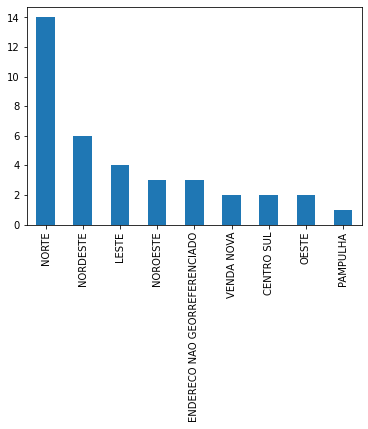

In [ ]:
menores = df[df.Idade < 18]
print(menores['Regional'].value_counts())

print('\n', '\n')

menores['Regional'].value_counts().plot(kind='bar');

In [ ]:
# Identificamos o bairro que apressenta a maior quantidade de crianças e adolescentes:
max_men = (menores['Regional'].value_counts()).max()

# Consultamos a moda dos bairros para obter o atributo (no caso, o nome do bairro) que possui maior quantidade.
bairro_menores = menores['Regional'].mode()[0]

print('O bairro com maior quantidade de menores de idade morando na rua, com um número de',max_men,'é:', bairro_menores)

O bairro com maior quantidade de menores de idade morando na rua, com um número de 14 é: NORTE


**3.3. Há crianças e adolescentes especialmente expostos e em situação de perigo por estarem só, sem contato com familiares?** <br>
**Se sim, em quais bairros eles estão?**

In [ ]:
criancas_so = criancas[(criancas.Contato_parente != 'Todo dia')]
print('Crianças sem companhia diária de adultos', '\n')
print(criancas_so.Regional.value_counts())
print('\n')
print('--------------------------TOTAL',criancas_so.Regional.count())
print('\n')

adol_so = adol[(adol.Contato_parente != 'Todo dia')]
print('Adolescentes sem companhia diária de adultos', '\n')
print(adol_so.Regional.value_counts())
print('\n')
print('--------TOTAL',adol_so.Regional.count())

Crianças sem companhia diária de adultos 

NORTE                            8
NORDESTE                         4
NOROESTE                         3
ENDERECO NAO GEORREFERENCIADO    3
LESTE                            2
CENTRO SUL                       1
VENDA NOVA                       1
OESTE                            1
Name: Regional, dtype: int64


--------------------------TOTAL 23


Adolescentes sem companhia diária de adultos 

NORDESTE      2
VENDA NOVA    1
Name: Regional, dtype: int64


--------TOTAL 3


## **4) SAÚDE**

**4.1. Quais as porcentagens da população que podem precisar atenções pediátrica, clínica de adultos e geriátrica, respetivamente?**

In [ ]:
porc_menores = round(len(menores)/quant_moradores,5)  #Porcentagem de menores

adultos = df[(df.Idade>= 18)&(df.Idade < 65)]
porc_adultos = round((len(adultos)/quant_moradores)*100,2)  #Porcentagem de adultos

idosos = df[df.Idade>= 65]
porc_idosos = round((len(idosos)/quant_moradores)*100,3)  #Porcentagem de idosos

print('Há', len(menores),'menores que podem precisar atenção pediátrica, o que é',porc_menores,'% da população de rua.')
print('Há', len(adultos),'pessoas que podem precisar atenção clínica de adulto, o que é',porc_adultos,'% da população de rua.')
print('Há', len(idosos),'idosos que podem precisar atenção geriátrica, o que é',porc_idosos,'% da população de rua.')

Há 37 menores que podem precisar atenção pediátrica, o que é 0.00427 % da população de rua.
Há 8354 pessoas que podem precisar atenção clínica de adulto, o que é 96.48 % da população de rua.
Há 268 idosos que podem precisar atenção geriátrica, o que é 3.095 % da população de rua.


In [ ]:
# Identificamos os bairros que apressentam a maior quantidade de adultos e idosos, respetivamente:
max_adult = (adultos['Regional'].value_counts()).max()
max_idosos = (idosos['Regional'].value_counts()).max()

# Consultamos as modas dos bairros para obter os atributos (no caso, o nomes dos bairro) que possuem as quantidades maiores.
bairro_adult = adultos['Regional'].mode()[0]
bairro_idosos = idosos['Regional'].mode()[0]

print(' * O bairro com maior quantidade de adultos, com uma quantidade de',max_adult,'é:', bairro_adult)
print('\n')
print(' * O bairro com maior quantidade de idosos, com uma quantidade de',max_idosos,'é:', bairro_idosos)

 * O bairro com maior quantidade de adultos, com uma quantidade de 4911 é: CENTRO SUL


 * O bairro com maior quantidade de idosos, com uma quantidade de 166 é: CENTRO SUL


**4.2. Qual a quantidade de mulheres que precisa asistencia em higiene menstrual?**

In [ ]:
# Limitamos o subconjunto da população feminina que está dentro da faixa etária da menstruação, e fazemos a contagem.
mulh_mens = mulheres[(mulheres.Idade>=11)&(mulheres.Idade<55)]

print('São', len(mulh_mens), 'as mulheres que precisam atenção em higiene menstrual')

São 769 as mulheres que precisam atenção em higiene menstrual


**4.3. Em quais bairros estão alocadas e quais os CRAS georreferenciados para gerenciar a atenção? <br>
4.4. Onde estão as mulheres que precisam dessa atenção mas que ficam fora da área de atuação de CRAIS?**

In [ ]:
mulh_mens.Regional.value_counts()

CENTRO SUL                       393
NORTE                             87
NOROESTE                          73
LESTE                             67
NORDESTE                          35
PAMPULHA                          31
VENDA NOVA                        29
OESTE                             27
BARREIRO                          19
ENDERECO NAO GEORREFERENCIADO      8
Name: Regional, dtype: int64

In [ ]:
mulh_mens.CRAS.value_counts()

ENDERECO FORA AREA CRAS                               614
CRAS PROVIDENCIA                                       61
CRAS VILA SENHOR DOS PASSOS                            32
CRAS VILA BIQUINHAS                                    20
ENDERECO NAO GEORREFERENCIADO                           8
CRAS PETROPOLIS                                         3
CRAS MANTIQUEIRA                                        2
CRAS ARTHUR DE SA   UNIAO                               2
CRAS GRANJA DE FREITAS                                  2
CRAS HAVAI VENTOSA                                      2
CRAS TAQUARIL                                           2
CRAS MORRO DAS PEDRAS   GRACA SABOIA                    2
CRAS CALIFORNIA                                         2
CRAS JARDIM FELICIDADE                                  2
CRAS NOVO OURO PRETO                                    2
CRAS VILA MARCOLA                                       1
CRAS NOVO AARAO REIS   BRASILINA MARIA DE OLIVEIRA      1
CRAS VILA MARI

In [ ]:
cras_fora = mulh_mens[(mulh_mens.CRAS == 'ENDERECO FORA AREA CRAS')]
cras_fora['Regional'].value_counts()

CENTRO SUL    390
LESTE          63
NOROESTE       38
NORDESTE       31
PAMPULHA       26
VENDA NOVA     26
OESTE          22
BARREIRO       15
NORTE           3
Name: Regional, dtype: int64

In [ ]:
cras_dentro = mulh_mens[(mulh_mens.CRAS != 'ENDERECO FORA AREA CRAS')]
cras_dentro['Regional'].value_counts()

NORTE                            84
NOROESTE                         35
ENDERECO NAO GEORREFERENCIADO     8
OESTE                             5
PAMPULHA                          5
NORDESTE                          4
BARREIRO                          4
LESTE                             4
VENDA NOVA                        3
CENTRO SUL                        3
Name: Regional, dtype: int64

O 50% de mulheres mais novas que precisam atenção em higiene menstrual tem entre 11 e 39 anos
O 50% de mulheres mais velhas que precisam atenção em higiene menstrual tem entre 39 e 55 anos

 



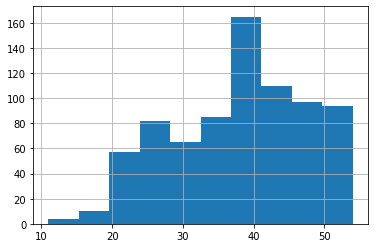

In [ ]:
medm = int(mulh_mens.Idade.median())
print('O 50% de mulheres mais novas que precisam atenção em higiene menstrual tem entre 11 e',medm,'anos')
print('O 50% de mulheres mais velhas que precisam atenção em higiene menstrual tem entre',medm,'e 55 anos')
print('\n','\n')

mulh_mens.Idade.hist();

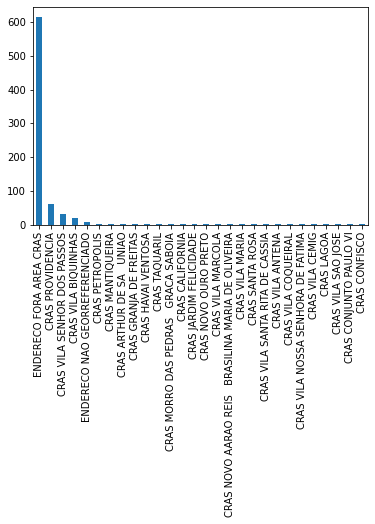

In [ ]:
mulh_mens['CRAS'].value_counts().plot(kind='bar');

## **5) EDUCAÇÃO E FORMAÇÃO PARA O TRABALHO**

**5.1. Qual o grua de educação da população?**

grau_cod  Grau_instrucao             
 1.0      Fundamental incompleto         4482
 4.0      Medio completo                 1282
 2.0      Fundamental completo           1246
 3.0      Medio incompleto                888
 0.0      Sem instrucao                   649
 5.0      Superior incompleto ou mais     102
-1.0      Nao Informado                    10
dtype: int64




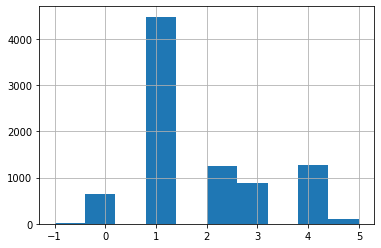

In [ ]:
instr_cat = OrdinalEncoder(categories=[['Nao Informado', 'Sem instrucao','Fundamental incompleto', 'Fundamental completo', 'Medio incompleto', 'Medio completo', 'Superior incompleto ou mais']])
instr_cat.fit(df[['Grau_instrucao']])
df['grau_cod'] = instr_cat.transform(df[['Grau_instrucao']])
df['grau_cod'] = df['grau_cod']-1

print(df[['grau_cod','Grau_instrucao']].value_counts())
print('\n')
df['grau_cod'].hist();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


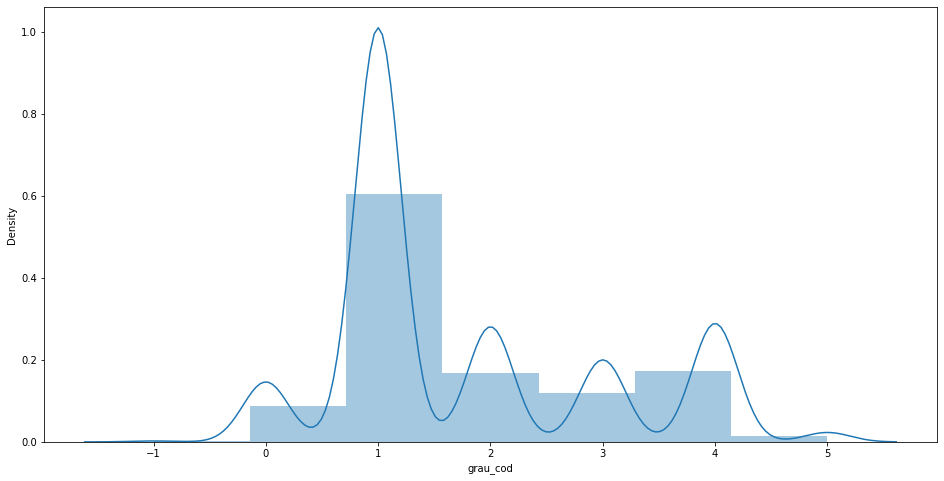

In [ ]:
ax = sns.distplot(df['grau_cod'],bins = 7)
ax.figure.set_size_inches(16,8)
ax;

**5.2. Em qual região do município está alocada a maior quantidade de pessoas que tem idade para trabalhar?**


In [ ]:
trabalhadores = df[(df.Idade >= 18)&(df.Idade < 65)]
print('População de rua em idade de trabalhar', '\n','\n', 'REGIÃO                       QUANTIDADE', '\n')
print(trabalhadores.Regional.value_counts())
print('Total----------------------------',trabalhadores.Idade.count())

print('\n')

print('REGIÃO                       PORCENTAGEM', '\n')
print(((trabalhadores.Regional.value_counts(1))*100).round(2))

# Identificamos o bairro que apressenta a maior quantidade de moradores de rua em idade de trabalhar:
max_trab = (trabalhadores['Regional'].value_counts()).max()

# Consultamos a moda dos bairros para obter o atributo (no caso, o nome do bairro) que possui maior quantidade.
bairro_trab = trabalhadores.Regional.mode()[0]

print('\n')
print('O bairro com maior quantidade de moradores de rua em idade de trabalhar, com',max_trab,'pessoas,', 'é:', bairro_trab)

População de rua em idade de trabalhar 
 
 REGIÃO                       QUANTIDADE 

CENTRO SUL                       4911
LESTE                            1082
NORTE                             634
NOROESTE                          566
VENDA NOVA                        278
OESTE                             236
BARREIRO                          222
NORDESTE                          200
PAMPULHA                          171
ENDERECO NAO GEORREFERENCIADO      54
Name: Regional, dtype: int64
Total---------------------------- 8354


REGIÃO                       PORCENTAGEM 

CENTRO SUL                       58.79
LESTE                            12.95
NORTE                             7.59
NOROESTE                          6.78
VENDA NOVA                        3.33
OESTE                             2.82
BARREIRO                          2.66
NORDESTE                          2.39
PAMPULHA                          2.05
ENDERECO NAO GEORREFERENCIADO     0.65
Name: Regional, dtype: float64



## **6) CONCLUSÕES**

*DESCRIÇÃO GERAL E ALIMENTAÇÃO*<br>
>Como vimos na descrição geral, a população de rua está localizada maioritariamente na zona Centro Sul, motivo pelo qual os contatos com igrejas, ONGs e outras associações que trabalhem servindo estas pessoas deverão se procurar nessa zona.<br>

>Destacamos que existem 1574 pessoas em situação econômica crítica, ou seja, carentes de bolsa família e com rendas inferiores a meio salário básico.<br><br>

*INFÂNCIA*
>Embora se tenha visto que maioria da população que mora nas ruas se localiza na região Centro Sul, é importante destacar que a maioria das crianças estão na região Norte.<br>

>Especial atenção merece o fator de que tem 23 menores de idade em risco, morando na rua sem companhia de adultos e expostos aos riscos que isso implica. A maioria deles se encontra na região Norte, porém esta análise faz um chamado de atenção às restantes, alocadas em outras regiões, segundo foi detalhado no ponto 3.3.<br>

*SAÚDE*<br>
>Tem 37 crianças e 268 idosos que podem precisar atenção pediátrica e geriatria, respetivamente. Tendo isso em consideração, se destaca que a população de rua pode precisar, maioritariamente, atenção clínica de adultos, tendo nas ruas 8354 adultos.<br>

>No marco da campanha de saúde menstrual, destacamos que tem 769 mulheres morando na rua dentro da faixa etária em que podem precisar atenção de higiene menstrual.

*EDUCAÇÃO E FORMAÇÃO PARA O TRABALHO* <br>
> O grau de instrução da população foi detalhado no ponto 5.1, tendo a maioria das pessoas o ensino fundamental incompleto.<br>

> As pessoas que tem idade para trabalhar são 8354 e, mais uma vez, a maioria (4911) se localizam na região Centro Sul.<br>

>Se chama a atenção sobre estas duas últimas informações aos departamentos da prefeitura responsáveis pela educação de menores e adultos. Também a aqueles responsáveis pela formação para o trabalho que possam gerar planos de capacitação.
